# Задача 1


## Описание среды

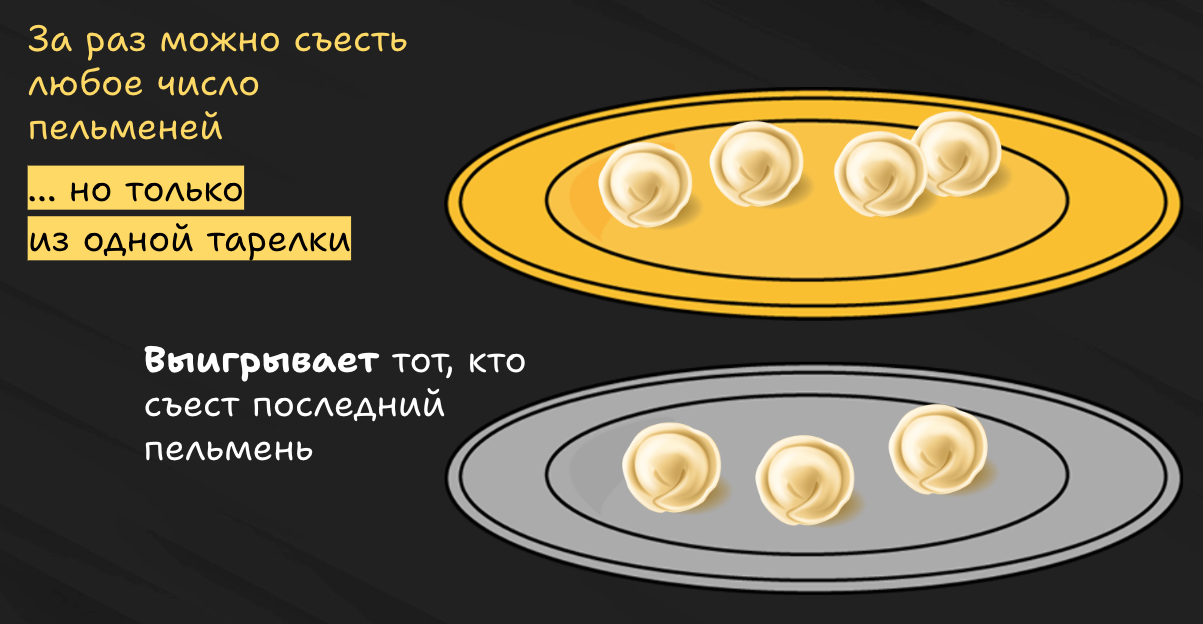

## Необходимые импорты

Импортируем прекрасный учебный модуль от Школы Анализа Данных Yandex:

In [ ]:
!wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/week02_value_based/mdp.py

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from mdp import *
from IPython.display import display

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## [2] Состояния

In [ ]:
states = ["4-3", "4-2", "4-1", ..., "0-0"]

In [ ]:
states = [f"{orange}-{gray}" for orange in range(5) for gray in range(4)]
states

['0-0',
 '0-1',
 '0-2',
 '0-3',
 '1-0',
 '1-1',
 '1-2',
 '1-3',
 '2-0',
 '2-1',
 '2-2',
 '2-3',
 '3-0',
 '3-1',
 '3-2',
 '3-3',
 '4-0',
 '4-1',
 '4-2',
 '4-3']

In [ ]:
ORANGE_NUM = 5
GRAY_NUM = 4
states = [f"{orange}-{gray}" for orange in range(ORANGE_NUM+1) for gray in range(GRAY_NUM+1)]

## [3] Действия

In [ ]:
actions = dict(keys=states)

In [ ]:
actions["2-1"] = ["2+0", "1+0", "0+1"]

In [ ]:
for _state in states:
  orange, gray = map(int, _state.split("-"))
  actions[f"{orange}-{gray}"] = [f"{v}+0" for v in range(1, orange+1)] + [f"0+{v}" for v in range(1, gray+1)]

In [ ]:
actions["2-1"]

['1+0', '2+0', '0+1']

In [ ]:
import rich
rich.print(actions)

{
    'keys': [
        '0-0',
        '0-1',
        '0-2',
        '0-3',
        '0-4',
        '1-0',
        '1-1',
        '1-2',
        '1-3',
        '1-4',
        '2-0',
        '2-1',
        '2-2',
        '2-3',
        '2-4',
        '3-0',
        '3-1',
        '3-2',
        '3-3',
        '3-4',
        '4-0',
        '4-1',
        '4-2',
        '4-3',
        '4-4',
        '5-0',
        '5-1',
        '5-2',
        '5-3',
        '5-4'
    ],
    '0-0': [],
    '0-1': ['0+1'],
    '0-2': ['0+1', '0+2'],
    '0-3': ['0+1', '0+2', '0+3'],
    '0-4': ['0+1', '0+2', '0+3', '0+4'],
    '1-0': ['1+0'],
    '1-1': ['1+0', '0+1'],
    '1-2': ['1+0', '0+1', '0+2'],
    '1-3': ['1+0', '0+1', '0+2', '0+3'],
    '1-4': ['1+0', '0+1', '0+2', '0+3', '0+4'],
    '2-0': ['1+0', '2+0'],
    '2-1': ['1+0', '2+0', '0+1'],
    '2-2': ['1+0', '2+0', '0+1', '0+2'],
    '2-3': ['1+0', '2+0', '0+1', '0+2', '0+3'],
    '2-4': ['1+0', '2+0', '0+1', '0+2', '0+3', '0+4'],
    '3-0': ['1+0', '2+0', '3+0'],
    '3-1': ['1+0', '2+0', '3+0', '0+1'],
    '3-2': ['1+0', '2+0', '3+0', '0+1', '0+2'],
    '3-3': ['1+0', '2+0', '3+0', '0+1', '0+2', '0+3'],
    '3-4': ['1+0', '2+0', '3+0', '0+1', '0+2', '0+3', '0+4'],
    '4-0': ['1+0', '2+0', '3+0', '4+0'],
    '4-1': ['1+0', '2+0', '3+0', '4+0', '0+1'],
    '4-2': ['1+0', '2+0', '3+0', '4+0', '0+1', '0+2'],
    '4-3': ['1+0', '2+0', '3+0', '4+0', '0+1', '0+2', '0+3'],
    '4-4': ['1+0', '2+0', '3+0', '4+0', '0+1', '0+2', '0+3', '0+4'],
    '5-0': ['1+0', '2+0', '3+0', '4+0', '5+0'],
    '5-1': ['1+0', '2+0', '3+0', '4+0', '5+0', '0+1'],
    '5-2': ['1+0', '2+0', '3+0', '4+0', '5+0', '0+1', '0+2'],
    '5-3': ['1+0', '2+0', '3+0', '4+0', '5+0', '0+1', '0+2', '0+3'],
    '5-4': ['1+0', '2+0', '3+0', '4+0', '5+0', '0+1', '0+2', '0+3', '0+4']
}

## [4] Динамика среды

In [ ]:
dynamics = {state: dict(keys=actions[state]) for state in states}

In [ ]:
dynamics["2-1"]["0+1"] = {"2-0": 1.}

In [ ]:
dynamics = {state: dict() for state in states}

for _state in states:
  for _action in actions[_state]:
    orange, gray = map(int, _state.split("-"))
    from_orange, from_gray = map(int, _action.split("+"))
    next_state = f"{orange - from_orange}-{gray - from_gray}"
    dynamics[_state][_action] = {next_state: 1.}

In [ ]:
dynamics["2-1"]["0+1"]

{'2-0': 1.0}

In [ ]:
print(dynamics)

In [ ]:
from pprint import pprint
pprint(dynamics)

In [ ]:
import rich
rich.print(dynamics)

{
    '0-0': {},
    '0-1': {'0+1': {'0-0': 1.0}},
    '0-2': {'0+1': {'0-1': 1.0}, '0+2': {'0-0': 1.0}},
    '0-3': {'0+1': {'0-2': 1.0}, '0+2': {'0-1': 1.0}, '0+3': {'0-0': 1.0}},
    '0-4': {'0+1': {'0-3': 1.0}, '0+2': {'0-2': 1.0}, '0+3': {'0-1': 1.0}, '0+4': {'0-0': 1.0}},
    '1-0': {'1+0': {'0-0': 1.0}},
    '1-1': {'1+0': {'0-1': 1.0}, '0+1': {'1-0': 1.0}},
    '1-2': {'1+0': {'0-2': 1.0}, '0+1': {'1-1': 1.0}, '0+2': {'1-0': 1.0}},
    '1-3': {'1+0': {'0-3': 1.0}, '0+1': {'1-2': 1.0}, '0+2': {'1-1': 1.0}, '0+3': {'1-0': 1.0}},
    '1-4': {
        '1+0': {'0-4': 1.0},
        '0+1': {'1-3': 1.0},
        '0+2': {'1-2': 1.0},
        '0+3': {'1-1': 1.0},
        '0+4': {'1-0': 1.0}
    },
    '2-0': {'1+0': {'1-0': 1.0}, '2+0': {'0-0': 1.0}},
    '2-1': {'1+0': {'1-1': 1.0}, '2+0': {'0-1': 1.0}, '0+1': {'2-0': 1.0}},
    '2-2': {'1+0': {'1-2': 1.0}, '2+0': {'0-2': 1.0}, '0+1': {'2-1': 1.0}, '0+2': {'2-0': 1.0}},
    '2-3': {
        '1+0': {'1-3': 1.0},
        '2+0': {'0-3': 1.0},
        '0+1': {'2-2': 1.0},
        '0+2': {'2-1': 1.0},
        '0+3': {'2-0': 1.0}
    },
    '2-4': {
        '1+0': {'1-4': 1.0},
        '2+0': {'0-4': 1.0},
        '0+1': {'2-3': 1.0},
        '0+2': {'2-2': 1.0},
        '0+3': {'2-1': 1.0},
        '0+4': {'2-0': 1.0}
    },
    '3-0': {'1+0': {'2-0': 1.0}, '2+0': {'1-0': 1.0}, '3+0': {'0-0': 1.0}},
    '3-1': {'1+0': {'2-1': 1.0}, '2+0': {'1-1': 1.0}, '3+0': {'0-1': 1.0}, '0+1': {'3-0': 1.0}},
    '3-2': {
        '1+0': {'2-2': 1.0},
        '2+0': {'1-2': 1.0},
        '3+0': {'0-2': 1.0},
        '0+1': {'3-1': 1.0},
        '0+2': {'3-0': 1.0}
    },
    '3-3': {
        '1+0': {'2-3': 1.0},
        '2+0': {'1-3': 1.0},
        '3+0': {'0-3': 1.0},
        '0+1': {'3-2': 1.0},
        '0+2': {'3-1': 1.0},
        '0+3': {'3-0': 1.0}
    },
    '3-4': {
        '1+0': {'2-4': 1.0},
        '2+0': {'1-4': 1.0},
        '3+0': {'0-4': 1.0},
        '0+1': {'3-3': 1.0},
        '0+2': {'3-2': 1.0},
        '0+3': {'3-1': 1.0},
        '0+4': {'3-0': 1.0}
    },
    '4-0': {'1+0': {'3-0': 1.0}, '2+0': {'2-0': 1.0}, '3+0': {'1-0': 1.0}, '4+0': {'0-0': 1.0}},
    '4-1': {
        '1+0': {'3-1': 1.0},
        '2+0': {'2-1': 1.0},
        '3+0': {'1-1': 1.0},
        '4+0': {'0-1': 1.0},
        '0+1': {'4-0': 1.0}
    },
    '4-2': {
        '1+0': {'3-2': 1.0},
        '2+0': {'2-2': 1.0},
        '3+0': {'1-2': 1.0},
        '4+0': {'0-2': 1.0},
        '0+1': {'4-1': 1.0},
        '0+2': {'4-0': 1.0}
    },
    '4-3': {
        '1+0': {'3-3': 1.0},
        '2+0': {'2-3': 1.0},
        '3+0': {'1-3': 1.0},
        '4+0': {'0-3': 1.0},
        '0+1': {'4-2': 1.0},
        '0+2': {'4-1': 1.0},
        '0+3': {'4-0': 1.0}
    },
    '4-4': {
        '1+0': {'3-4': 1.0},
        '2+0': {'2-4': 1.0},
        '3+0': {'1-4': 1.0},
        '4+0': {'0-4': 1.0},
        '0+1': {'4-3': 1.0},
        '0+2': {'4-2': 1.0},
        '0+3': {'4-1': 1.0},
        '0+4': {'4-0': 1.0}
    },
    '5-0': {
        '1+0': {'4-0': 1.0},
        '2+0': {'3-0': 1.0},
        '3+0': {'2-0': 1.0},
        '4+0': {'1-0': 1.0},
        '5+0': {'0-0': 1.0}
    },
    '5-1': {
        '1+0': {'4-1': 1.0},
        '2+0': {'3-1': 1.0},
        '3+0': {'2-1': 1.0},
        '4+0': {'1-1': 1.0},
        '5+0': {'0-1': 1.0},
        '0+1': {'5-0': 1.0}
    },
    '5-2': {
        '1+0': {'4-2': 1.0},
        '2+0': {'3-2': 1.0},
        '3+0': {'2-2': 1.0},
        '4+0': {'1-2': 1.0},
        '5+0': {'0-2': 1.0},
        '0+1': {'5-1': 1.0},
        '0+2': {'5-0': 1.0}
    },
    '5-3': {
        '1+0': {'4-3': 1.0},
        '2+0': {'3-3': 1.0},
        '3+0': {'2-3': 1.0},
        '4+0': {'1-3': 1.0},
        '5+0': {'0-3': 1.0},
        '0+1': {'5-2': 1.0},
        '0+2': {'5-1': 1.0},
        '0+3': {'5-0': 1.0}
    },
    '5-4': {
        '1+0': {'4-4': 1.0},
        '2+0': {'3-4': 1.0},
        '3+0': {'2-4': 1.0},
        '4+0': {'1-4': 1.0},
        '5+0': {'0-4': 1.0},
        '0+1': {'5-3': 1.0},
        '0+2':

## Изобразим в виде графа

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

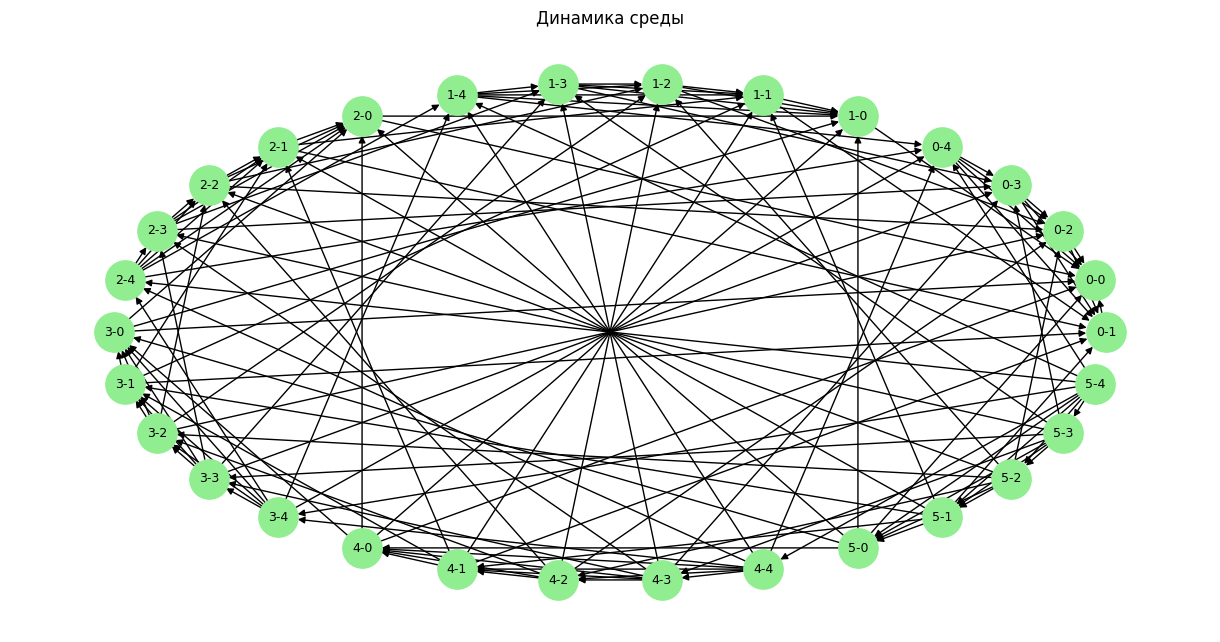

In [ ]:
graph = dynamics
G = nx.DiGraph()

for state, actions in graph.items():
    for action, options in actions.items():
      next_state = list(options.keys())[0]
      G.add_edge(state, next_state)
      # Если хотим с подписями весов
      # G.add_edge(state, next_state, weight=sum(action))

plt.figure(figsize=(12, 6))
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightgreen',
        node_size=800, font_size=9)

# Добавляем подписи весов
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Динамика среды")
plt.show()

## Пусть их будет поменьше

In [ ]:
ORANGE_NUM = 2
GRAY_NUM = 1

# Состояния
states = [f"{orange}-{gray}" for orange in range(ORANGE_NUM+1) for gray in range(GRAY_NUM+1)]

# Действия
actions = {state: [] for state in states}
for _state in states:
  orange, gray = map(int, _state.split("-"))
  actions[f"{orange}-{gray}"] = [f"{v}+0" for v in range(1, orange+1)] + [f"0+{v}" for v in range(1, gray+1)]

# Динамика среды (переходы)
dynamics = {state: dict() for state in states}

for _state in states:
  for _action in actions[_state]:
    orange, gray = map(int, _state.split("-"))
    from_orange, from_gray = map(int, _action.split("+"))
    next_state = f"{orange - from_orange}-{gray - from_gray}"
    dynamics[_state][_action] = {next_state: 1.}

rich.print(dynamics)

{
    '0-0': {},
    '0-1': {'0+1': {'0-0': 1.0}},
    '1-0': {'1+0': {'0-0': 1.0}},
    '1-1': {'1+0': {'0-1': 1.0}, '0+1': {'1-0': 1.0}},
    '2-0': {'1+0': {'1-0': 1.0}, '2+0': {'0-0': 1.0}},
    '2-1': {'1+0': {'1-1': 1.0}, '2+0': {'0-1': 1.0}, '0+1': {'2-0': 1.0}}
}

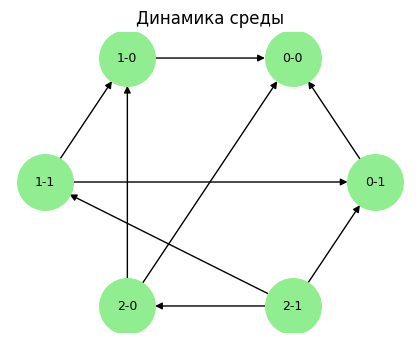

In [ ]:
graph = dynamics
G = nx.DiGraph()

for _state, _actions in graph.items():
    for _action, _options in _actions.items():
      next_state = list(_options.keys())[0]
      G.add_edge(_state, next_state)

plt.figure(figsize=(4, 3))
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightgreen',
        node_size=1600, font_size=9)

plt.title("Динамика среды")
plt.show()

## Ничего не забыли?

Сложность моделирования vs. Сложность решения

* Робототехника
* Рекоммендательные системы

In [ ]:
WIN = "0-0"

# Динамика среды (переходы)
for _state in states:
  dynamics[_state] = dict()
  for _action in actions[_state]:
    dynamics[_state][_action] = dict()
    orange, gray = map(int, _state.split("-"))
    from_orange, from_gray = map(int, _action.split("+"))
    next_state = f"{orange - from_orange}-{gray - from_gray}"
    options_num = len(actions[next_state])

    if next_state == WIN:
      dynamics[_state][_action] = {WIN: 1.0}
      continue

    for competitor_action in actions[next_state]:
      from_orange, from_gray = map(int, competitor_action.split("+"))
      orange, gray = map(int, next_state.split("-"))
      from_orange, from_gray = map(int, competitor_action.split("+"))
      very_next_state = f"{orange - from_orange}-{gray - from_gray}"
      dynamics[_state][_action][very_next_state] = 1. / options_num
rich.print(dynamics)

{
    '0-0': {},
    '0-1': {'0+1': {'0-0': 1.0}},
    '1-0': {'1+0': {'0-0': 1.0}},
    '1-1': {'1+0': {'0-0': 1.0}, '0+1': {'0-0': 1.0}},
    '2-0': {'1+0': {'0-0': 1.0}, '2+0': {'0-0': 1.0}},
    '2-1': {'1+0': {'0-1': 0.5, '1-0': 0.5}, '2+0': {'0-0': 1.0}, '0+1': {'1-0': 0.5, '0-0': 0.5}}
}

## [5] Награды

In [ ]:
PRIZE = 100
FINE = -100
WIN = "0-0"

In [ ]:
actions

Если нет противника

In [ ]:
for _state in states:
  for _action in actions[_state]:
    orange, gray = map(int, _state.split("-"))
    from_orange, from_gray = map(int, _action.split("+"))
    next_orange = orange - from_orange
    next_gray = gray - from_gray
    next_state = f"{next_orange}-{next_gray}"
    trophy = 0
    if next_state == WIN:
      trophy = PRIZE
    # Если хотим еще и наказывать?
    if (next_orange * next_gray == 0) and (next_orange + next_gray > 0):
      trophy = FINE
    rewards[_state][_action] = {next_state: trophy}

NameError: name 'PRIZE' is not defined

In [ ]:
rich.print(rewards)

Если есть противник

In [ ]:
WIN = "0-0"
PRIZE = 100
FINE = -100

# Динамика среды (переходы)
for _state in states:
  dynamics[_state] = dict()
  for _action in actions[_state]:
    orange, gray = map(int, _state.split("-"))
    from_orange, from_gray = map(int, _action.split("+"))
    next_state = f"{orange - from_orange}-{gray - from_gray}"
    options_num = len(actions[next_state])
    dynamics[_state][_action] = dict()

    if next_state == WIN:
      dynamics[_state][_action] = {WIN: 1.0}

    for competitor_action in actions[next_state]:
      from_orange, from_gray = map(int, competitor_action.split("+"))
      orange, gray = map(int, next_state.split("-"))
      from_orange, from_gray = map(int, competitor_action.split("+"))
      very_next_state = f"{orange - from_orange}-{gray - from_gray}"
      dynamics[_state][_action][very_next_state] = 1. / options_num
rich.print(dynamics)

{
    '0-0': {},
    '0-1': {'0+1': {'0-0': 1.0}},
    '1-0': {'1+0': {'0-0': 1.0}},
    '1-1': {'1+0': {'0-0': 1.0}, '0+1': {'0-0': 1.0}},
    '2-0': {'1+0': {'0-0': 1.0}, '2+0': {'0-0': 1.0}},
    '2-1': {'1+0': {'0-1': 0.5, '1-0': 0.5}, '2+0': {'0-0': 1.0}, '0+1': {'1-0': 0.5, '0-0': 0.5}}
}

In [ ]:
rewards = dict()
for _state in states:
  rewards[_state] = dict()
  for _action in actions[_state]:
    rewards[_state][_action] = dict()
    orange, gray = map(int, _state.split("-"))
    from_orange, from_gray = map(int, _action.split("+"))
    next_orange = orange - from_orange
    next_gray = gray - from_gray
    next_state = f"{next_orange}-{next_gray}"
    if next_state == WIN:
      rewards[_state][_action][next_state] = PRIZE
      continue
    for competitor_action in actions[next_state]:
      from_orange, from_gray = map(int, competitor_action.split("+"))
      orange, gray = map(int, next_state.split("-"))
      from_orange, from_gray = map(int, competitor_action.split("+"))
      very_next_state = f"{orange - from_orange}-{gray - from_gray}"
      if very_next_state == WIN:
        rewards[_state][_action][very_next_state] = FINE
      else:
        rewards[_state][_action][very_next_state] = 0

In [ ]:
rich.print(rewards)

{
    '0-0': {},
    '0-1': {'0+1': {'0-0': 100}},
    '1-0': {'1+0': {'0-0': 100}},
    '1-1': {'1+0': {'0-0': -100}, '0+1': {'0-0': -100}},
    '2-0': {'1+0': {'0-0': -100}, '2+0': {'0-0': 100}},
    '2-1': {'1+0': {'0-1': 0, '1-0': 0}, '2+0': {'0-0': -100}, '0+1': {'1-0': 0, '0-0': -100}}
}

Модель мира имеется...

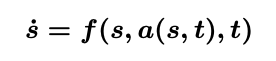

## Markov Decision Process

Марковский процесс принятия решений

In [ ]:
START = f"{ORANGE_NUM}-{GRAY_NUM}"
pelmeni_mdp = MDP(dynamics, rewards, initial_state=START)

In [ ]:
START

'2-1'

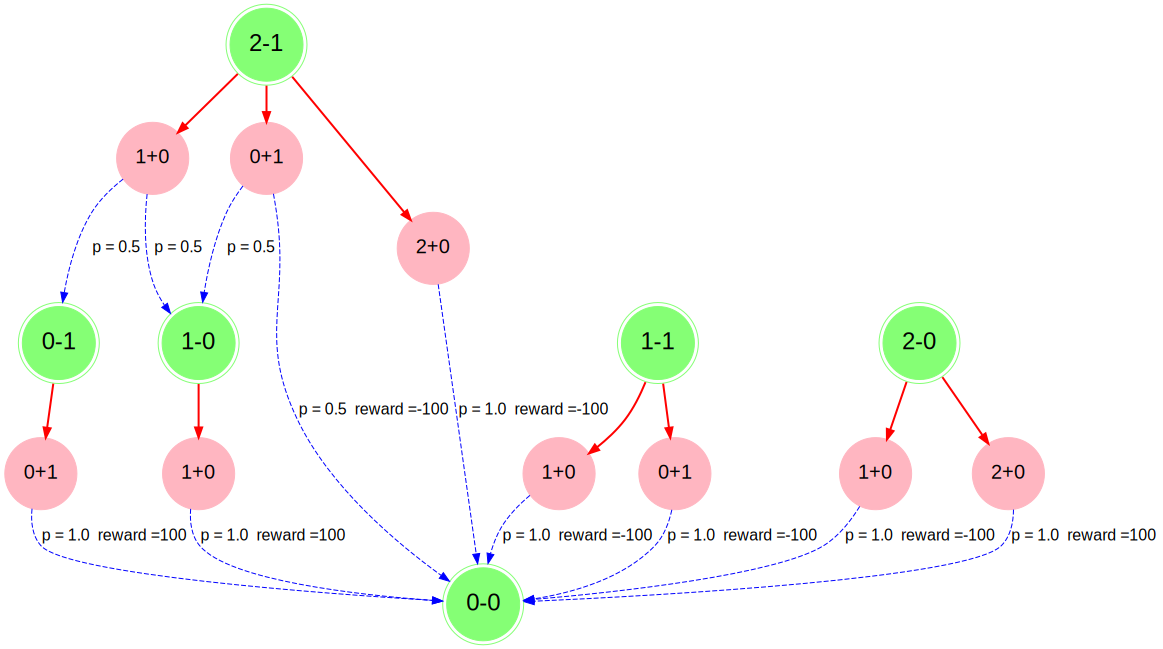

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
plot_graph(pelmeni_mdp, s_node_size='0.01', a_node_size='0.01', rankdir='UD')

In [ ]:
plot_graph(pelmeni_mdp, s_node_size='0.1', a_node_size='0.1', rankdir='LR')

## Политики

In [ ]:
policy_random = {state: dict() for state in states}

for _state in states:
  for _action in actions[_state]:
    orange, gray = map(int, _state.split("-"))
    action_n = len(actions[_state])
    policy_random[_state][_action] = 1. / action_n
rich.print(policy_random)

{
    '0-0': {},
    '0-1': {'0+1': 1.0},
    '1-0': {'1+0': 1.0},
    '1-1': {'1+0': 0.5, '0+1': 0.5},
    '2-0': {'1+0': 0.5, '2+0': 0.5},
    '2-1': {'1+0': 0.3333333333333333, '2+0': 0.3333333333333333, '0+1': 0.3333333333333333}
}

## Пробуем взаимодействовать со средой

In [ ]:
current_state = pelmeni_mdp.reset()
pelmeni_mdp.render()

In [ ]:
possible_actions = pelmeni_mdp.get_possible_actions(current_state)
possible_actions

In [ ]:
from numpy.random import choice
from typing import *

def choose_action(policy: Dict[str, Dict[str, float]], current_state: str) -> str:
  possible_actions = policy[current_state]
  options = list(possible_actions.keys())
  probabilities = list(possible_actions.values())
  action = choice(options, p=probabilities) # Check your Python version
  return str(action)

In [ ]:
action = choose_action(policy_random, current_state)
action

In [ ]:
next_state, reward, done, info = pelmeni_mdp.step(action)

In [ ]:
print(f"{next_state=}, {reward=}, {done=}, {info=}")

## Эпизоды

In [ ]:
def do_episode(env_mdp: MDP, policy: Dict[str, Dict[str, float]]):
  current_state = env_mdp.reset()
  done = False
  trace = [current_state]
  while not done:
    env_mdp.render()
    action = choose_action(policy, current_state)
    print(f"I did [{action}]")
    next_state, _, done, info = env_mdp.step(action)
    current_state = next_state
    trace += [current_state]
  env_mdp.render()

In [ ]:
do_episode(pelmeni_mdp, policy_random)

In [ ]:
do_episode(pelmeni_mdp, policy_random)

С наградой

In [ ]:
def get_score_of_episode(env_mdp: MDP, policy: Dict[str, Dict[str, float]]):
  score = 0
  current_state = env_mdp.reset()
  done = False
  trace = [current_state]
  while not done:
    action = choose_action(policy, current_state)
    next_state, reward, done, info = env_mdp.step(action)
    current_state = next_state
    trace += [current_state]
    score += reward
  return score

## Агенты

In [ ]:
score = get_score_of_episode(pelmeni_mdp, policy_random)
score

# Задача 2

In [ ]:
!pip3 install -q gymnasium[classic-control]

In [ ]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
import gymnasium as gym
env = gym.make('CliffWalking-v1', render_mode='rgb_array')

## Про среду

**cliff** = утес

<img src=https://github.com/yandexdataschool/Practical_RL/raw/master/yet_another_week/_resource/cliffworld.png width=600>
<center><i>Image from CS188</i></center>

Документация: https://gymnasium.farama.org/v1.0.0/environments/toy_text/cliff_walking/




* **Начальное положение:** [3, 0] = $12 \cdot 3 + 0$ = [36]
* **Обычный шаг:** -1
* **Прыжок с утеса:** -100
* **Финиш:** [3, 11] = $12 \cdot 3 + 11$ = [47]

**Действия:**

**0:** ⬆️ Move up

**1:** ➡️ Move right

**2:** ⬇️ Move down

**3:** ⬅️ Move left

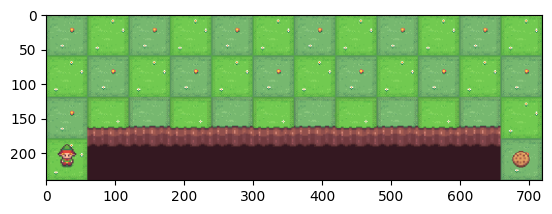

In [ ]:
action = env.reset()
render = env.render()
plt.imshow(render)

In [ ]:
print(f"Observation space: {env.observation_space}")
print(f"Action space: {env.action_space}")
env.action_space.n

Observation space: Discrete(48)
Action space: Discrete(4)


np.int64(4)

In [ ]:
env.reset()
action = env.step(1)
action = env.step(1)
action

(36, -100, False, False, {'prob': 1.0})

(`Новое место`, `Награда`, `Закончили?`, `Время вышло?`, {**prob:** `Вероятность перехода` (всегда `1`)})

 * `new_observation`: an observation right after committing the action `a`
 * `reward`: a number representing your reward for committing action `a`
 * `terminated`: True if the MDP has just finished, False if still in progress
 * `truncated`: True if the number of steps **elapsed >= max episode** steps
 * `info`: some auxiliary stuff about what just happened. For now, ignore it.

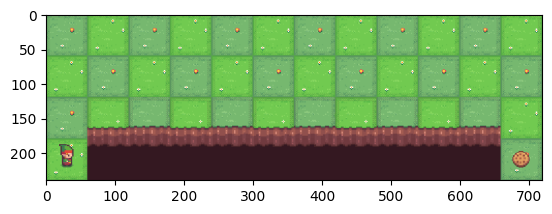

In [ ]:
render = env.render()
plt.imshow(render)

# Задача 3

## CartPole

* **Документация**: https://gymnasium.farama.org/environments/classic_control/cart_pole/

* **Действия:**

   * **0:** ⬅️ Движение влево

   * **1:** ➡️ Движение вправо

* **Состояния:**

<img src="https://i.ibb.co/Pbyq3v2/Screenshot-2025-04-14-at-16-25-08.png" alt="Тут должно было быть описание состояний" border="0">

* **Цель:**

Удерживать стержень как можно дольше (свободный кончик стержня не должен касаться поверхности)

* **Награды:**

`+1` за каждый шаг, когда мы не проиграли (на терминальном -- тоже)

* **Начальное состояние:**

All observations are assigned a uniformly random value in `(-0.05, 0.05)`

* **Конец:**

  * **Termination:** Pole Angle > ±12°

  * **Termination:** Cart Position > ±2.4 (центр тележки за границами экрана)

  * **Truncation:** Episode length > 500




### Иллюстрация 1

<img src="https://i.sstatic.net/cZ483.gif" width="200">



### Иллюстрация 2

По сути это так:

<img src="https://timallanwheeler.com/blog/wp-content/uploads/2022/11/cartpole_lqr-1.gif">